<a href="https://colab.research.google.com/github/rsinha15/Mini-Project/blob/main/mini_project_raka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install bing-image-downloader

In [2]:
!mkdir images

In [20]:
!rm -r /content/images/rose

In [21]:
from bing_image_downloader import downloader
downloader.download("roses",limit=40,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 13 Images on Page 1.


[%] Downloading Image #1 from http://thefullbouquetblog.com/wp-content/uploads/2011/04/6a01127918a34b28a4014e602fbec1970c-800wi.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://wallpapersite.com/images/wallpapers/flower-bouquet-2048x1536-roses-colorful-flower-vase-pink-hd-12956.jpg
[!] Issue getting: https://wallpapersite.com/images/wallpapers/flower-bouquet-2048x1536-roses-colorful-flower-vase-pink-hd-12956.jpg
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #2 from https://www.florissa.com/wp-content/uploads/2018/02/Late-Summer-Blooming-Perennials-683x1024.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://flirtyfleurs.com/wp-content/uploads/2014/04/Botany-Flowers.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.rosesandrings.com/wp-content/uploads/2018/01/Vintage-Royalty-Wedding-Cake.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.thetreecenter

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

target = []
flat_data =[]
images=[]

DATADIR='/content/drive/MyDrive/images'
CATEGORIES=['cars','lion','roses']

for i in CATEGORIES:
  class_num=CATEGORIES.index(i)
  path = os.path.join(DATADIR,i)
  #print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)


In [23]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<BarContainer object of 3 artists>

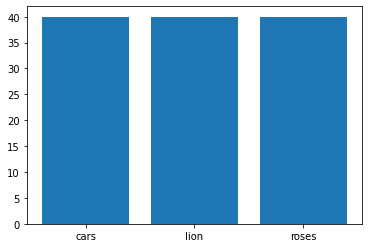

In [24]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=0)

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[{'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [58]:
y_pred=clf.predict(x_test)
y_pred

array([1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1,
       0, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 0, 2])

In [59]:
y_test

array([1, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 1, 1,
       0, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 0, 2])

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [61]:
accuracy_score(y_pred,y_test)

1.0

In [62]:
confusion_matrix(y_pred,y_test)

array([[12,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 11]])

In [63]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [64]:
model=pickle.load(open('img_model.p','rb'))

Enter your URL:https://media1.s-nbcnews.com/j/streams/2013/May/130531/6C7667845-bill-m--finkA2B913F6-9BBA-DC95-F80D-4EE18C13D5DF.fit-760w.jpg
(330, 474, 3)
PREDICTED OUTPUT:lion


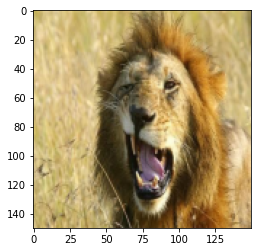

In [69]:
flat_data=[]
url=input('Enter your URL:')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')